In [0]:
#importing Libraries
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


In [0]:
#reading dataset
train_df = pd.read_csv('/content/Train.csv')
test_df = pd.read_csv('/content/test.csv')

In [43]:
print(train_df.columns.values)

['SL. No.' 'Class' 'Age' 'time' 'adv_bookdays' 'weekday' 'month'
 'monthday' 'demand' 'from_ind' 'to_ind' 'Fare']


In [44]:
train_df.head()

,SL. No.,Class,Age,time,adv_bookdays,weekday,month,monthday,demand,from_ind,to_ind,Fare
0,1,0,77.2,39,69,0,0,3,1,5,4,11854.27
1,2,0,45.3,34,10,4,1,11,1,2,4,14968.50
2,3,0,70.9,36,17,1,2,7,1,1,4,5859.32
3,4,0,35.1,31,28,1,4,9,1,7,4,2774.19
4,5,0,41.8,33,17,4,6,28,1,7,4,3833.66


In [45]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
SL. No.         4999 non-null int64
Class           4999 non-null int64
Age             4999 non-null float64
time            4999 non-null int64
adv_bookdays    4999 non-null int64
weekday         4999 non-null int64
month           4999 non-null int64
monthday        4999 non-null int64
demand          4999 non-null int64
from_ind        4999 non-null int64
to_ind          4999 non-null int64
Fare            4999 non-null float64
dtypes: float64(2), int64(10)
memory usage: 468.8 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
SL. No.         1001 non-null int64
Class           1001 non-null int64
Age             1001 non-null float64
time            1001 non-null int64
adv_bookdays    1001 non-null int64
weekday         1001 non-null int64
month           1001 non-null int64
mo

In [46]:
train_df.describe()

,SL. No.,Class,Age,time,adv_bookdays,weekday,month,monthday,demand,from_ind,to_ind,Fare
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,3103.027005,0.257051,48.478436,37.325465,23.414283,3.035207,4.331266,15.372474,1.267654,3.606721,3.985997,8525.626751
std,1816.650469,0.437052,18.635317,5.992250,15.141569,2.006582,2.817279,8.862410,0.538230,1.990615,2.043300,6521.815943
min,1.000000,0.000000,12.800000,24.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1132.820000
25%,1507.500000,0.000000,33.900000,33.000000,12.000000,1.000000,2.000000,8.000000,1.000000,2.000000,2.000000,4359.290000
50%,3067.000000,0.000000,48.100000,38.000000,21.000000,3.000000,4.000000,15.000000,1.000000,3.000000,4.000000,6626.410000
75%,4679.500000,1.000000,64.100000,42.000000,33.000000,5.000000,7.000000,23.000000,1.000000,5.000000,6.000000,10546.235000
max,6234.000000,1.000000,83.700000,48.000000,95.000000,6.000000,11.000000,31.000000,5.000000,7.000000,7.000000,84141.470000


In [47]:
train_df[['Class','Fare']].groupby(['Class'], as_index=False).mean().sort_values(by = 'Fare', ascending = False)

,Class,Fare
1,1,15338.180101
0,0,6168.564001


Fare is higher for Business Class.

In [0]:
#converting the Column 'Age' to int type
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

In [49]:
train_df[['month','Fare']].groupby(['month'], as_index = False).mean().sort_values(by = 'Fare', ascending = False)

,month,Fare
3,3,8957.985551
0,0,8853.969198
6,6,8847.637240
8,8,8662.810515
5,5,8598.179362
2,2,8448.169910
1,1,8378.391221
4,4,8324.655923
7,7,8233.266275
9,9,7767.484515


In [50]:
train_df[['demand','Fare']].groupby(['demand'], as_index = False).mean().sort_values(by = 'Fare', ascending = False)

,demand,Fare
0,1,8612.244973
1,2,8366.712090
2,3,7761.875098
3,4,6161.112381
4,5,3129.196667


In [51]:
train_df[['weekday','Fare']].groupby(['weekday'], as_index = False).mean().sort_values(by = 'weekday', ascending = False)

,weekday,Fare
6,6,10845.146253
5,5,7831.057510
4,4,7487.000370
3,3,7341.323884
2,2,7282.101344
1,1,7422.850514
0,0,11445.205244


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


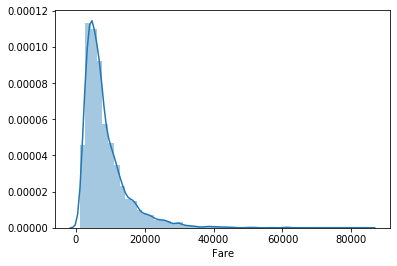

In [53]:
# visualizing the airline fare price
sns.distplot(train_df['Fare'])

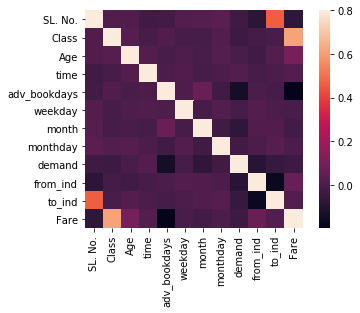

In [54]:
# plotting heat map of correlation among features
corrmat = train_df.corr()
sns.heatmap(corrmat,vmax=.8, square=True)

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships.

In [0]:
# Selecting Features and Labels
X = np.asanyarray(train_df[['Class',	'Age',	'time',	'adv_bookdays',	'weekday',	'month',	'monthday',	'demand',	'from_ind',	'to_ind']])
Y = np.asanyarray(train_df['Fare'])


In [56]:
# Splitting the dataset in train and test file
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 42, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape

((3499, 10), (3499,), (1500, 10))

In [57]:
# making pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline,make_pipeline

steps = [('scalar', StandardScaler()),('poly', PolynomialFeatures(degree=2)),('model',xgb.XGBRegressor())]
pipeline = Pipeline(steps)
pipeline.fit(X_train,Y_train)

# or we can do the above job in just 1 line of code
t = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),RandomForestRegressor()).fit(X_train,Y_train)


print('training score :{}'.format(pipeline.score(X_train,Y_train)))
print('test score :{}'.format(pipeline.score(X_test,Y_test)))

print('Training score: {}'.format(t.score(X_train,Y_train)))
print('test score: {}'.format(t.score(X_test, Y_test)))

[07:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
training score :0.8788700866782061
test score :0.8110820994882829
Training score: 0.9619698184640749
test score: 0.7445938048430585


In [58]:
y_pred = pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
import math

mse = mean_squared_error(Y_test,y_pred)
rmse = math.sqrt(mse)
r2score = r2_score(Y_test,y_pred)


print('rmse: {}'.format(rmse))
print('r2score: {}'.format(r2score))

rmse: 2817.857545880714
r2score: 0.8110820994882829
